# **Name:- Jinay Ashok Shah**

## Task-4:-Traffic Accident Pattern Analysis and Hotspot Visualization Using the US Accidents Dataset

### Task-4 -- Part 3:-Weather and Spatial Analysis

This part analyzes which weather conditions are most associated with accidents and plots accident hotspots on a map.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

C:\Users\Admin\AppData\Local\Temp\ipykernel_4268\4082400842.py:2: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US_Accidents_March23.csv')


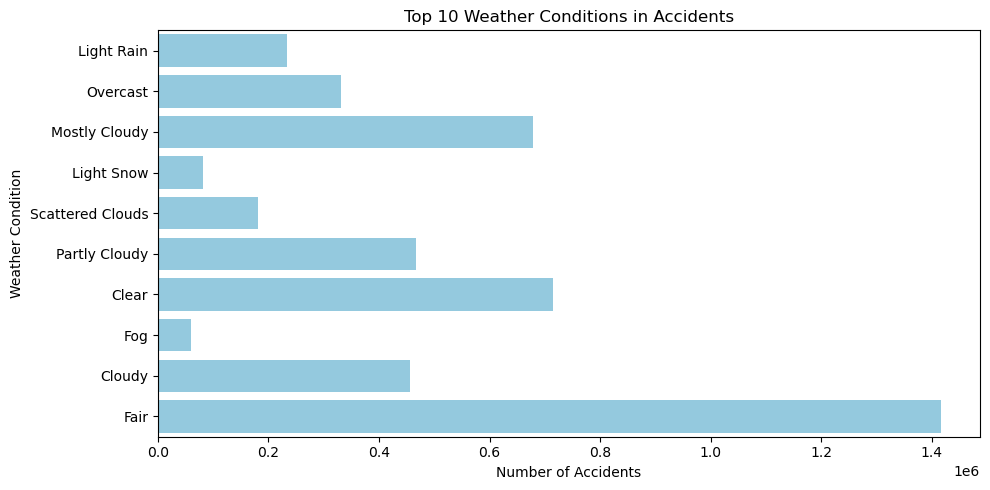

In [6]:
# Load and preprocess dataset again
df = pd.read_csv('US_Accidents_March23.csv')
df = df.dropna(subset=['Start_Time', 'Weather_Condition'])
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# ===== Weather Condition Plot =====
plt.figure(figsize=(10, 5))

# Get top 10 weather conditions
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index

# Plot countplot
sns.countplot(y='Weather_Condition', 
              data=df[df['Weather_Condition'].isin(top_weather)],
              color='skyblue')

# Labels and title
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.title("Top 10 Weather Conditions in Accidents")

# Save plot (optional)
plt.tight_layout()
plt.savefig("weather_conditions.png")

# Show plot
plt.show()

In [7]:
# ===== Folium Heatmap =====
import folium
from folium.plugins import HeatMap

# Filter for non-null coordinates
df_map = df[['Start_Lat', 'Start_Lng']].dropna()

# Sample a subset to reduce rendering time (e.g., 20,000 rows)
df_sample = df_map.sample(n=20000, random_state=42)

# Create base map centered on average coordinates
map_accidents = folium.Map(location=[df_sample['Start_Lat'].mean(), df_sample['Start_Lng'].mean()],
                           zoom_start=5)

# Add heatmap layer
HeatMap(data=df_sample[['Start_Lat', 'Start_Lng']], radius=8).add_to(map_accidents)

# Display map
map_accidents